In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [12]:
df = pd.read_csv("Data/Lowsal_1000_Data.csv", index_col = "ID")
df.head()

,Generator,Status,Result Status,Proxy Role,Keep SR2,Has SR2,Highlight,Aqu_Ca,Aqu_Cl,Aqu_Mg,...,Inj_NaComp,Inj_SO4Comp,InjectorStw,Tres,Inj_Temp,Oil_Recovery,Execution Node,Dataset Path,Optimal,Comment
ID,,,,,,,,,,,,,,,,,,,,,
0,Reuse,Reused,NormalTermination,Ignore,Yes,True,False,0.461377,4.232650,0.095454,...,0.039800,0.002233,265.698099,186.0,200.0,54.070404,NaN,Lowsal Base.dat,False,NaN
1,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.455662,5.896138,0.089591,...,0.055044,0.000430,225.843800,195.3,240.0,58.107647,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00001.dat,False,NaN
2,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.118815,5.896138,0.130806,...,0.037691,0.001479,305.553200,204.6,240.0,54.625271,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00002.dat,False,NaN
3,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.203027,1.014785,0.089591,...,0.037691,0.000167,318.838100,213.9,200.0,62.981243,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00003.dat,False,NaN
4,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.539874,3.106793,0.172022,...,0.046368,0.001217,265.698500,167.4,220.0,53.564529,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00004.dat,False,NaN


In [13]:
df.columns

Index(['Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR2',
       'Has SR2', 'Highlight', 'Aqu_Ca', 'Aqu_Cl', 'Aqu_Mg', 'Aqu_Na',
       'Aqu_SO4', 'Inj_CaComp', 'Inj_Cl', 'Inj_MgComp', 'Inj_NaComp',
       'Inj_SO4Comp', 'InjectorStw', 'Tres', 'Inj_Temp', 'Oil_Recovery',
       'Execution Node', 'Dataset Path', 'Optimal', 'Comment'],
      dtype='object')

In [14]:
df.drop(columns= (['Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR2',
                  'Has SR2', 'Highlight', 'Execution Node', 'Dataset Path', 'Optimal', 'Comment']), inplace = True)
df.head()

,Aqu_Ca,Aqu_Cl,Aqu_Mg,Aqu_Na,Aqu_SO4,Inj_CaComp,Inj_Cl,Inj_MgComp,Inj_NaComp,Inj_SO4Comp,InjectorStw,Tres,Inj_Temp,Oil_Recovery
ID,,,,,,,,,,,,,,
0,0.461377,4.232650,0.095454,2.980450,0.006371,0.000811,0.045412,0.004341,0.039800,0.002233,265.698099,186.0,200.0,54.070404
1,0.455662,5.896138,0.089591,0.773737,0.003324,0.008118,0.028078,0.013916,0.055044,0.000430,225.843800,195.3,240.0,58.107647
2,0.118815,5.896138,0.130806,4.625155,0.002375,0.005432,0.040414,0.012406,0.037691,0.001479,305.553200,204.6,240.0,54.625271
3,0.203027,1.014785,0.089591,5.725560,0.009964,0.008118,0.003406,0.001836,0.037691,0.000167,318.838100,213.9,200.0,62.981243
4,0.539874,3.106793,0.172022,1.874142,0.001426,0.003642,0.089757,0.003346,0.046368,0.001217,265.698500,167.4,220.0,53.564529


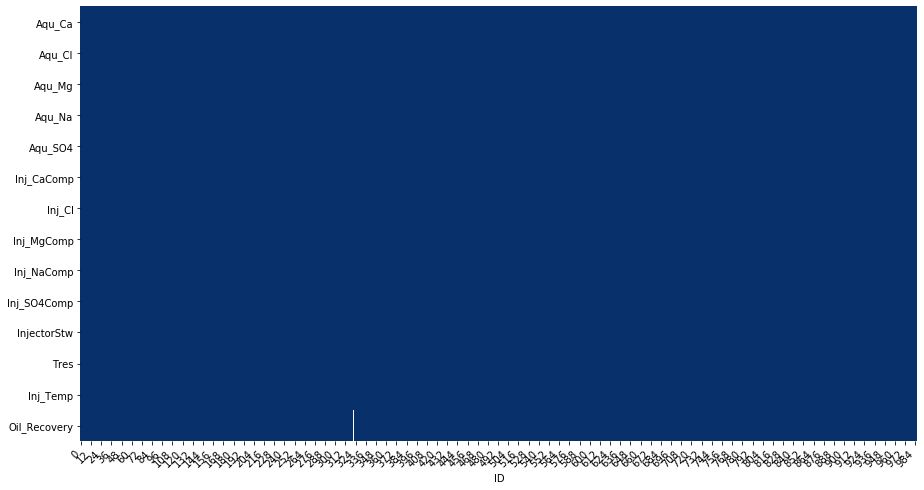

In [15]:
plot_missing_value(df)

In [18]:
df.dropna(inplace = True)

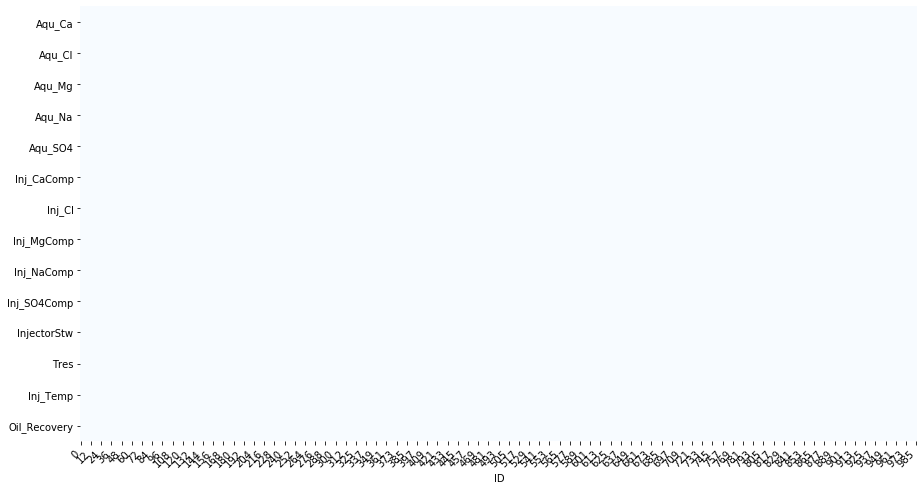

In [19]:
plot_missing_value(df)

In [26]:
X = df.drop(columns='Oil_Recovery')
y = df.Oil_Recovery

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((788, 13), (198, 13), (788,), (198,))

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', poly = 1), X.columns )])


from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50,  n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 48, 'algo__max_features': 0.8219772826786358, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 188}
0.9895912534773913 0.9070539201236318 0.9119632723199055


In [30]:
from jcopml.feature_importance import mean_loss_decrease, mean_score_decrease

,feature,importance
10,Inj_SO4Comp,0.543491
5,Aqu_SO4,0.198294
11,InjectorStw,0.167447
2,Aqu_Cl,0.015847
8,Inj_MgComp,0.011747
4,Aqu_Na,0.009538
12,Tres,0.009193
6,Inj_CaComp,0.009114
13,Inj_Temp,0.008632
7,Inj_Cl,0.007335


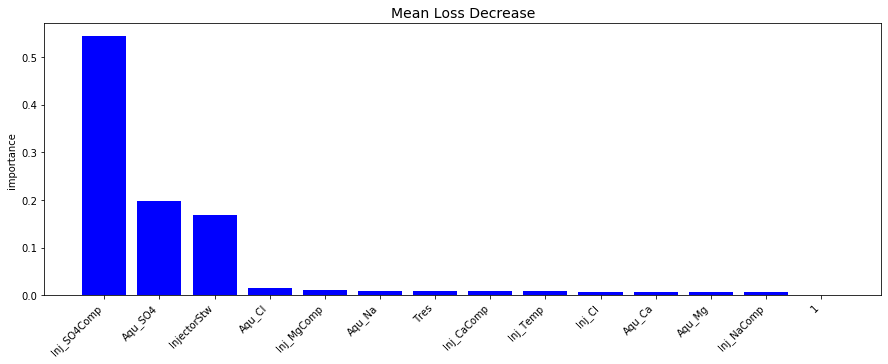

In [36]:
mean_loss_decrease(X_train, model_RF, plot=True)

,feature,importance,stdev
9,Inj_SO4Comp,1.262859,0.022445
4,Aqu_SO4,0.440032,0.028297
10,InjectorStw,0.339873,0.009915
1,Aqu_Cl,0.013391,0.002645
7,Inj_MgComp,0.009333,0.000558
11,Tres,0.009022,0.000487
12,Inj_Temp,0.007212,0.000446
3,Aqu_Na,0.006637,0.000533
5,Inj_CaComp,0.006113,0.000406
6,Inj_Cl,0.004278,0.000429


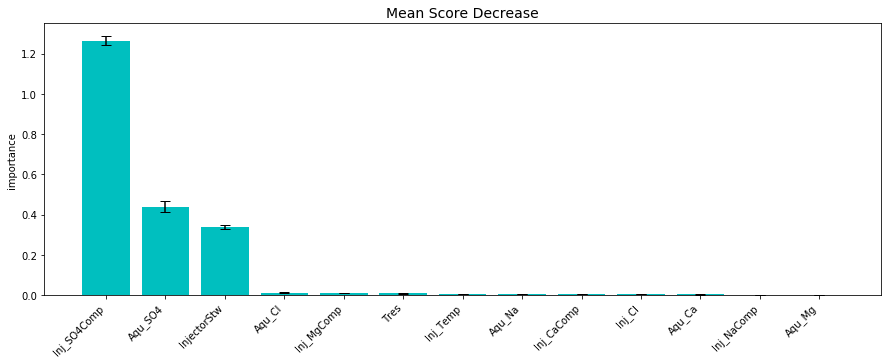

In [33]:
mean_score_decrease(X_train, y_train, model_RF, plot = True, topk = None)